# Some Math to get started
SGMS 2025

These notes will go through some key concepts from Algebra and Calculus, offering a concise overview of fundamental topics such as matrices, vector spaces, and linear independence. Whether you're brushing up on basics or exploring these concepts for the first time, these notes will serve as a helpful reference.

- Matrix

- Vector Space

- Matrix Multiplication

- Linear Independence

- Norms

- Inner Product

- Determinant

- Trace

- Eigenvalues and Eigenvectors

- Orthogonal Projection

- Matrix Approximation

Start with the necessary libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

Just setting some preliminary code for the visualizations


In [3]:
# Consistent font for plot titles :p
rcParams['font.family'] = 'DejaVu Sans'

# I. Matrix
*****

A matrix is a rectangular array of numbers (or other mathematical objects) arranged in rows and columns.  It's a fundamental concept in linear algebra, used to represent linear transformations, systems of equations, and more.

**Definition:** An m x n matrix A is a rectangular array of elements a<sub>ij</sub>, where i represents the row number and j represents the column number.

$$ A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix} $$

**Visualization:** It can also be visualized as a collection of vectors.  Each row (or column) can be interpreted as a vector in n-dimensional (or m-dimensional) space.

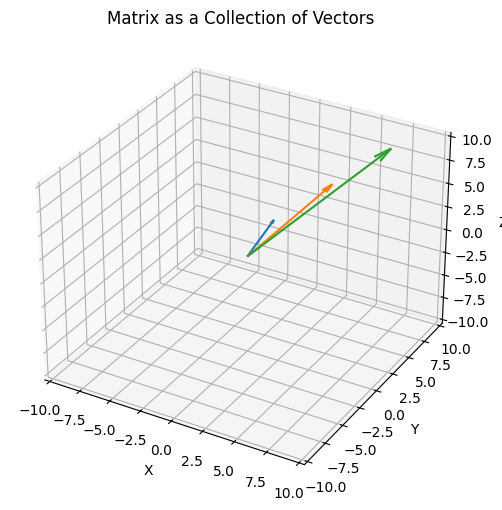

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example 3x3 matrix (for 3D visualization)
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Plotting the rows as vectors
for i in range(matrix.shape[0]):
    row = matrix[i]
    ax.quiver(0, 0, 0, row[0], row[1], row[2], arrow_length_ratio=0.1, color=f'C{i}')  # Different colors for rows

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Matrix as a Collection of Vectors')
plt.show()

## **Python Code Example:**
### Creating a matrix

In [5]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Accessing elements of the matrix:

In [6]:
print(matrix[0, 1])  # Element at row 0, column 1 (output: 2)

2


### Matrix dimensions

In [7]:
print(matrix.shape)  # (rows, columns) (output: (3, 3))

(3, 3)


### Transpose of the matrix

In [8]:
print(matrix.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


# II. Vector Spaces
****

A vector space is a set of vectors that can be scaled (scalar multiplication) and added together (vector addition) while remaining in the same space. It is defined over a field of scalars (usually real numbers).

**Definition:** A vector space V over a field F is a set with two operations:

- Vector addition:  For any u, v ∈ V, u + v ∈ V.
- Scalar multiplication: For any u ∈ V and any scalar c ∈ F, c * u ∈ V.

These operations must satisfy certain axioms (e.g., associativity, commutativity, distributivity, existence of zero vector and additive inverse).

Imagine each row vector as defining a "direction" in 3D space.  The plane we associate with that row vector is a 2D subspace that contains that line (defined by the row vector).  It's as if we're "widening" our view from just the line (spanned by the row vector) to a plane that includes that line. This plane shows all the vectors that can be created by scaling the row vector and adding vectors that are orthogonal to it. 

## Example of a linear space and its graphic example.

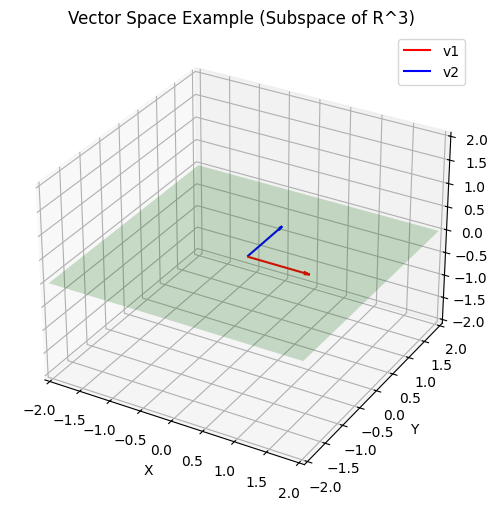

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example vectors spanning a 2D subspace within R^3
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])

# Plotting the vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], arrow_length_ratio=0.1, color='r', label='v1')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], arrow_length_ratio=0.1, color='b', label='v2')

# Visualizing the plane spanned by v1 and v2 (a subspace of R^3) - a simplified plane
x_plane = np.linspace(-2, 2, 10)
y_plane = np.linspace(-2, 2, 10)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = 0 * X_plane # Z = 0 plane for this example since v1 and v2 are in the x-y plane
ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.2, color='green')


ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector Space Example (Subspace of R^3)')
ax.legend()
plt.show()

The plane above contains those vectors, but it is generated by the orthogonal vectors.

## 3x3 matrix and its graphical representation as three lineal spaces.

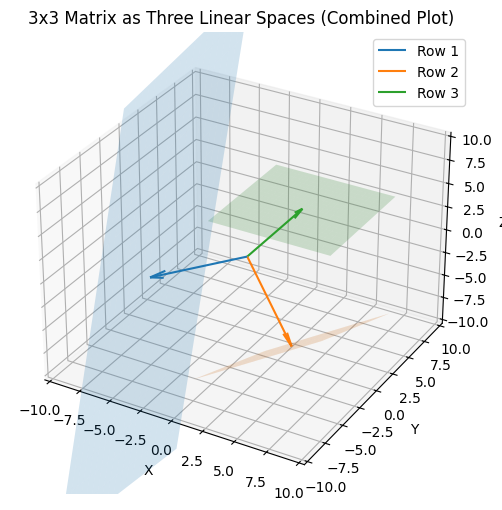

In [10]:
matrix_3x3 = np.array([[-3, -8, 2], [5, -2.5, -6], [0, 8, 0]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Only one subplot now

for i in range(3):
    row = matrix_3x3[i]
    ax.quiver(0, 0, 0, row[0], row[1], row[2], arrow_length_ratio=0.15, color=f'C{i}', label=f'Row {i+1}') # Labels added
    
    # Plotting the plane spanned by each row (simplified representation) at the vector's end point.
    if np.linalg.norm(row) > 0: # Avoids error if row is the zero vector
        # Create a grid for the plane, centered at the origin
        x_plane, y_plane = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20)) # Smaller grid for better visualization

        # Calculate the z values of the plane.  This is the CORRECTED part:
        if row[2] != 0:
          z_plane = (-row[0] * x_plane - row[1] * y_plane) / row[2]
        else:
          if row[1] != 0:
            z_plane = (-row[0] * x_plane) / row[1] #if row[2] == 0 and row[1] != 0
          else:
            z_plane = 0 * x_plane #if row[2] == 0 and row[1] == 0, then row[0] must be different than 0

        # Shift the plane so it passes through the tip of the vector.
        ax.plot_surface(x_plane + row[0], y_plane + row[1], z_plane + row[2], alpha=0.2, color=f'C{i}') # Shifted plane


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3x3 Matrix as Three Linear Spaces (Combined Plot)')
ax.legend() # Show the legend
plt.show()

Above, each plane is constructed in a way that it is tangent to the row vector (from the matrix, remember) at its endpoint, *e.g.* the blue plane is generated by the first Row.

This means the row vector lies within the plane, and the plane gives a visual sense of a 2D space associated with that row vector's direction.  It's important to remember that this plane is not uniquely defined by the row vector (there are infinitely many planes that contain the line spanned by the vector).  However, the way we're constructing the plane (by finding an orthogonal direction) gives us a consistent and visually informative representation of a 2D space related to each row vector.

# 3. Matrix Multiplication
******

Matrix multiplication is a fundamental operation that combines two matrices to produce a new matrix. It represents the composition of linear transformations.

**Definition:** If A is an m x n matrix and B is an n x p matrix, their product C = AB is an m x p matrix, where the element c<sub>ij</sub> is the dot product of the i-th row of A and the j-th column of B.

$c_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj}$

**Visualization:** Matrix multiplication can be visualized as a transformation of vectors. A matrix acts on a vector, changing its direction and/or magnitude.

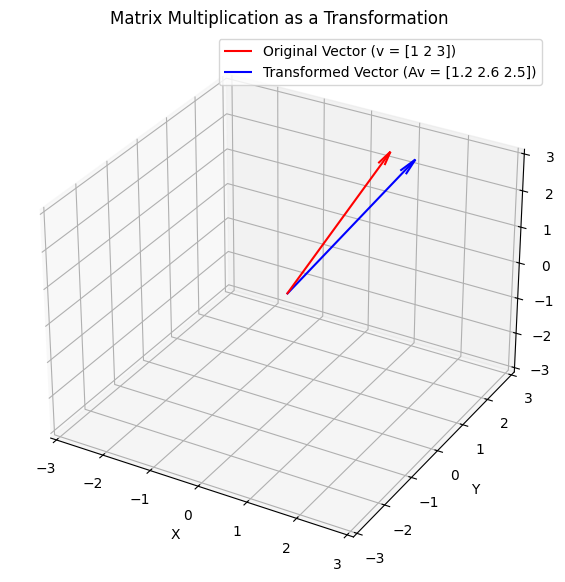

In [11]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Lets use these simple vectors, they are fed to Python as arrays:
A = np.array([[0.5, 0.2, 0.1], [0.1, 0.8, 0.3], [0.2, 0.1, 0.7]])  # 3x3 matrix
v = np.array([1, 2, 3])  # 3D vector, remember: shape is 1X3 

# this, the resulting matrix will be: 1X3.

v_transformed = A @ v  # This is a Matrix-vector multiplication

# Now we plot the vectors (original and transformed)
# Plotting the original and transformed vectors with labels showing the vector values
ax.quiver(0, 0, 0, v[0], v[1], v[2], arrow_length_ratio=0.09, color='r', label=f'Original Vector (v = {v})')
ax.quiver(0, 0, 0, v_transformed[0], v_transformed[1], v_transformed[2], arrow_length_ratio=0.1, color='b', label=f'Transformed Vector (Av = {v_transformed})')


ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Matrix Multiplication as a Transformation')
ax.legend()
plt.show()

Now, the following code shows some **Python Code Examples:**

Let $A = \begin{bmatrix} 1 & 2 \\ 3&4 \end{bmatrix}$, $B = \begin{bmatrix} 5 & 6 \\ 7&8 \end{bmatrix}$,  and $v = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$.

This are 2x2 matrix and a transposed vector. Let's multiply:

**Case1:** 

 $C = AB = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}$ = $\begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}$. 

 Note that the order in which you multiply affects the result. This is crucial:

 $D = BA = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ = $\begin{bmatrix} 23 & 34 \\ 31 & 46 \end{bmatrix}$. 

**Case2:**

 $W = Av = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ = $\begin{bmatrix} 5 \\ 11 \end{bmatrix}$. 

And:

 $W1 = vA = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ = $\begin{bmatrix} 7 \\ 10 \end{bmatrix}$.

The first one involves a 2x2 matrix vs a 2x1 vector that gives us a 2,1 matrix/vector.

In [12]:
# First, set them up in python
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
v = np.array([1, 2])

Case 1: Matrix multiplication

In [13]:
C = A @ B  # or C = np.dot(A, B)
print(C)

# REMEMBER: The order affects:
D = B @ A
print("Order AFFECTS. This is important!:")
print("D=",D)

[[19 22]
 [43 50]]
Order AFFECTS. This is important!:
D= [[23 34]
 [31 46]]


Case 2. Matrix-vector multiplication

In [14]:
w = A @ v
print(w)

# REMEMBER: The order affects:
w1 = v @ A
print(w1)

[ 5 11]
[ 7 10]


# 4. Linear Independence
****

A set of vectors is linearly independent if no vector in the set can be expressed as a linear combination of the other vectors in the set.  In other words, the only linear combination that results in the zero vector is the trivial combination where all scalars are zero.

**Definition:** Vectors v<sub>1</sub>, v<sub>2</sub>, ..., v<sub>n</sub> are linearly independent if the equation:

$c_1v_1 + c_2v_2 + ... + c_nv_n = 0$

has only the trivial solution c<sub>1</sub> = c<sub>2</sub> = ... = c<sub>n</sub> = 0."

**Visualization:**

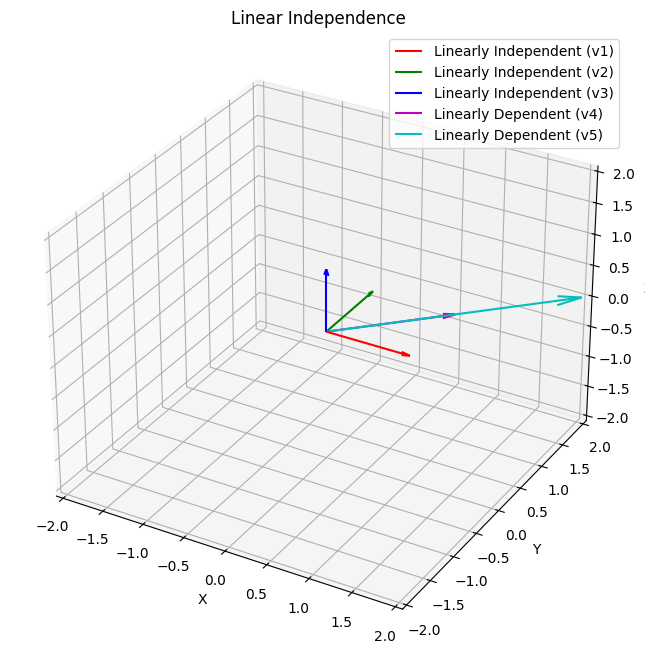

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Linearly independent vectors
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
v3 = np.array([0, 0, 1])

# Linearly dependent vectors (v4 is a linear combination of v1 and v2)
v4 = np.array([1, 1, 0]) # v1 + v2
v5 = np.array([2, 2, 0]) # 2 * v4

# Plotting linearly independent vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], arrow_length_ratio=0.1, color='r', label='Linearly Independent (v1)')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], arrow_length_ratio=0.1, color='g', label='Linearly Independent (v2)')
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], arrow_length_ratio=0.1, color='b', label='Linearly Independent (v3)')

# Plotting linearly dependent vectors
ax.quiver(0, 0, 0, v4[0], v4[1], v4[2], arrow_length_ratio=0.1, color='m', label='Linearly Dependent (v4)')
ax.quiver(0, 0, 0, v5[0], v5[1], v5[2], arrow_length_ratio=0.1, color='c', label='Linearly Dependent (v5)')


ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Linear Independence')
ax.legend()
plt.show()

**Python Code Example:**

Check linear independence using rank

In [24]:
matrix1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # Linearly independent rows
rank = np.linalg.matrix_rank(matrix1)
print(matrix1)
print(f'Rank, linearly independent vectors: {rank}') # If rank == number of vectors, they are linearly independent.

matrix2 = np.array([[1, 0, 0], [0, 1, 0], [1, 1, 0]]) # Linearly dependent rows
rank2 = np.linalg.matrix_rank(matrix2)
print(matrix2)
print(f'Rank, linearly dependent vectors: {rank2}')

[[1 0 0]
 [0 1 0]
 [0 0 1]]
Rank, linearly independent vectors: 3
[[1 0 0]
 [0 1 0]
 [1 1 0]]
Rank, linearly dependent vectors: 2


### **Implications of Linear Independence: Unique Solutions in Projections**

One crucial implication of linear independence arises in the context of projections. When we project a vector onto a subspace, we often want to find the 'best' representation of that vector within the subspace.  This often involves solving a system of linear equations.

Consider projecting a vector *b* onto the column space of a matrix *A*.  If the columns of *A* are linearly independent, then the projection of *b* onto the column space of *A* is *unique*.  This means there's only one linear combination of the columns of *A* that gives us the closest vector to *b* within that subspace.

In geometric terms, if the vectors that span our subspace (the columns of *A*) are linearly independent, then the 'shadow' (projection) of *b* onto that subspace is a single, well-defined point. There isn't any ambiguity about where the projection lands.

**Illustrative 2D Example:**

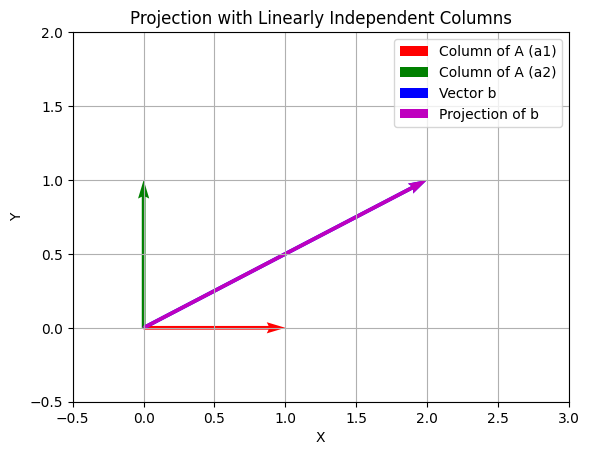

In [27]:
fig, ax = plt.subplots()

# Linearly independent vectors (columns of A)
a1 = np.array([1, 0])
a2 = np.array([0, 1])

# Vector to be projected (b)
b = np.array([2, 1])

# Let's calculate the projection:
# Note: If we were dealing with higher dimensions, we'd use the projection matrix formula.
projection = (np.dot(b, a1) / np.dot(a1, a1)) * a1 + (np.dot(b, a2) / np.dot(a2, a2)) * a2

# Plotting
ax.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Column of A (a1)')
ax.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1, color='g', label='Column of A (a2)')
ax.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')
ax.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='m', label='Projection of b')


ax.set_xlim([-.5, 3])
ax.set_ylim([-.5, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Projection with Linearly Independent Columns')
ax.legend()
ax.grid() # Add grid for better visualization
plt.show()

However, if the columns of *A* are linearly *dependent*, the projection may not be unique. There could be multiple 'solutions' or, in geometric terms, the 'shadow' of *b* might be smeared across a region of the subspace.

### **Orthogonality and Projections**

**Intuition:** Orthogonality plays a crucial role in understanding projections, especially in the context of finding the "best" representation of a vector within a subspace.  Two vectors are orthogonal if their dot product is zero. Geometrically, this means they are **perpendicular to each other**.

Formal Definition: Two vectors $u$ and $v$ are orthogonal if and only if:

$u \cdot v = 0$

**Orthogonal Subspaces:**  A subspace $U$ is orthogonal to another subspace $V$ if every vector in $U$ is orthogonal to every vector in $V$.

**Orthogonal Complement:** The orthogonal complement of a subspace U, denoted as U<sup>⊥</sup>, is the set of all vectors that are orthogonal to every vector in $U$.

**Projection and Orthogonality:** When we project a vector b onto a subspace U, the resulting projection, let's call it $p$, has a special relationship with the error vector $(b - p)$.  The error vector is orthogonal to the subspace U.  This is a key property of orthogonal projections.

Mathematically, if $p$ is the projection of $b$ onto $U$, then:

$(b - p) \cdot u = 0,  \forall u \in U$

This means that the difference between the original vector $b$ and its projection $p$ is perpendicular to every vector in the subspace $U$.  This orthogonality is what makes $p$ the "closest" vector in $U$ to $b$.  Any other vector in $U$ would result in a larger error vector.

Projection Matrix and Orthogonality: The projection matrix $P$ that projects onto a subspace $U$ has the property that any vector in the orthogonal complement of $U$ (i.e., $U$<sup>⊥</sup>) is mapped to the zero vector when multiplied by $P$.  In other words, if $x$ is in $U^⊥$, then:

$Px = 0$

This reinforces the idea that the projection "ignores" any component of a vector that is orthogonal to the subspace onto which we are projecting.  It focuses solely on the component that lies within the subspace.

# 4. Norms

A norm is a function that assigns a positive 'length' or 'size' to a vector. It generalizes the concept of absolute value for scalars to vectors.

**Definition:** A norm on a vector space $V$ is a function $||.||: V → R$ that satisfies the following properties:

- Non-negativity: $||x|| ≥ 0 $ for all $x ∈ V$, and $||x|| = 0$ if and only if $x = 0$.
- Homogeneity: $||αx|| = |α| ||x||$ for all $x ∈ V$ and all scalars $α$.
- Triangle inequality: $||x + y|| ≤ ||x|| + ||y||$ for all $x, y ∈ V$.

Some common norms include:

- **Euclidean norm (L2 norm):**  $||x||$<sub>2</sub>$ = √(x$<sub>1</sub><sup>2</sup>$ + x$<sub>2</sub><sup>2</sup>$ + ... + x$<sub>n</sub><sup>2</sup>)
- **Manhattan norm (L1 norm):** $||x||$<sub>1</sub>$ = |x$<sub>1</sub>$| + |x$<sub>2</sub>$|+ ... + |x$<sub>n</sub>$|$
- **Maximum norm (L∞ norm):** $||x||$<sub>∞</sub>$ = max($|x$<sub>1</sub>$|$, $|x$<sub>2</sub>$|$, ..., $|x$<sub>n</sub>$|$)

**Visualization (2D - showing unit circles for different norms)**

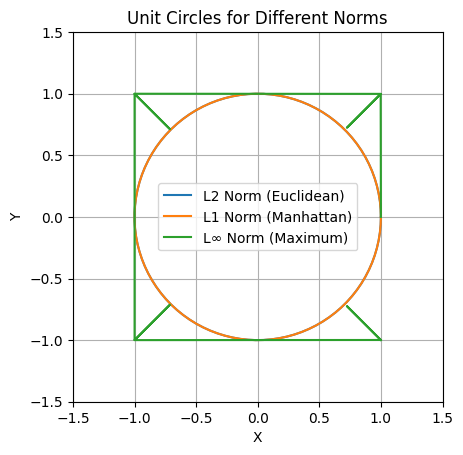

In [32]:
fig, ax = plt.subplots()

# Create points for unit circles
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Plot L2 norm (unit circle)
ax.plot(x_circle, y_circle, label='L2 Norm (Euclidean)')

# Plot L1 norm (diamond)
ax.plot(np.sign(x_circle) * np.abs(x_circle)**1, np.sign(y_circle) * np.abs(y_circle)**1, label='L1 Norm (Manhattan)')

# Plot Linf norm (square)
ax.plot(np.sign(x_circle) * np.max(np.abs(np.array([x_circle, y_circle])), axis=0), np.sign(y_circle) * np.max(np.abs(np.array([x_circle, y_circle])), axis=0), label='L∞ Norm (Maximum)')

ax.set_aspect('equal')  # Ensure circles appear circular
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Unit Circles for Different Norms')
ax.legend()
ax.grid(True)
plt.show()

**Example Usage:**

In [33]:
v = np.array([1, 2, 3])
l2 = np.linalg.norm(v)
l1 = np.linalg.norm(v, 1)
linf = np.linalg.norm(v, np.inf)

print("Vector:", v)
print("L2 Norm:", l2)
print("L1 Norm:", l1)
print("Infinity Norm:", linf)

Vector: [1 2 3]
L2 Norm: 3.7416573867739413
L1 Norm: 6.0
Infinity Norm: 3.0


**Some final remarks on Norms**

Norms provide a way to quantify the "size" or "magnitude" of a vector.  Think of it as a way to measure how "long" a vector is.  The Euclidean norm (L2 norm) is the most common and corresponds to our everyday notion of distance.  It's like using a ruler to measure the length of a line.  However, other norms exist that measure "size" in different ways.  The Manhattan norm (L1 norm), for example, measures the distance traveled along the axes, like walking along city blocks.  The maximum norm (L∞ norm) measures the largest component of the vector.  The choice of norm depends on the specific application and what aspect of "size" is most relevant.  Norms are essential for comparing vectors, determining convergence in iterative algorithms, and defining the notion of closeness in vector spaces.

**Additional insigths: on the generalization given by Measure Theory**

The concept of a norm is closely related to the more general mathematical framework of measure theory.  In measure theory, we define "measures" that assign a "size" to sets.  Norms can be seen as a special case of measures applied to vector spaces.  While norms specifically deal with vector spaces and must satisfy the properties of non-negativity, homogeneity, and the triangle inequality, measures are more general and can be applied to a wider class of sets.  For example, a measure could represent the area of a region in a plane or the volume of a solid.  The connection between norms and measures highlights the fundamental idea of quantifying "size" or "magnitude," which is a central theme in many areas of mathematics. One of the best reading to learn about this topic is certainly: Real Analysis, by Royden. [Real Analysis, by Royden](https://amzn.to/3EuMBwI), I encourage you to get it!

[XXXXX]

****
**SGMS 2025** Under construction.